In [24]:
from pprint import pprint
import os
import json
import numpy as np
import mplleaflet as leaf
import shapely.geometry as geo
import shapely.ops as ops
import descartes as dc
from importlib import reload
import matplotlib.pyplot as plt
import .grid as grid

In [25]:
base_path = os.path.join('C:\\', 'Users', 'glenn', 'src', 'pycommute')
map_boundary_file = os.path.join(base_path, 'map_boundary.json')

POLYGON ((10.439415 59.6344346, 11.0834885 59.6344346, 11.0834885 59.9906592, 10.439415 59.9906592, 10.439415 59.6344346))


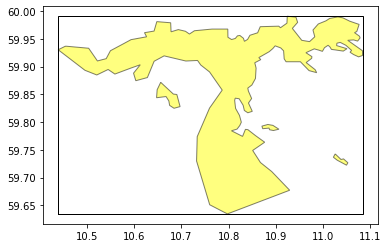

In [26]:
with open(map_boundary_file, 'r') as f:
    map_boundary = json.load(f)
boundary_polygons = map_boundary['boundary_polygons']

polygons = []
for polygon in boundary_polygons:
    #polygon = np.fliplr(polygon)

    polygons.append(geo.Polygon(polygon))

union = ops.unary_union(polygons)
bounding_box = union.envelope
print(bounding_box)

fig, ax = plt.subplots()
for polygon in polygons:
    patch = dc.PolygonPatch(polygon, fc='yellow', ec='black', alpha=0.5)
    ax.add_patch(patch)
patch = dc.PolygonPatch(bounding_box, fc='None', ec='black')
ax.add_patch(patch)
plt.axis('auto')
plt.show()
leaf.show(fig)